In [99]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [92]:
# Import the data, downloaded from here: https://dataset.floodlightopen.com/public-blobs-prod/complete_dataset.csv
raw_df = pd.read_csv("C:\\Users\\MKO\\Downloads\\complete_dataset.csv")

In [93]:
# First glimpse
raw_df.head()

,floodlightOpenId,participantCreatedOn,participantDemographicId,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testMetricName,testResultMetricId,testResultMetricCreatedOn,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 16
0,FL26992374,4/23/2018 11:43:21 AM +00:00,72,False,US,male,1997,195.0,188.0,Daily Questions,Mood Response,115873,4/24/2018 6:19:33 AM +00:00,NaN,NaN,3.00,NaN
1,FL26992374,4/23/2018 11:43:21 AM +00:00,72,False,US,male,1997,195.0,188.0,Pinching,Successful Pinches,115874,4/24/2018 6:20:06 AM +00:00,NaN,NaN,25.00,NaN
2,FL26992374,4/23/2018 11:43:21 AM +00:00,72,False,US,male,1997,195.0,188.0,Pinching,Hand Used,115875,4/24/2018 6:20:06 AM +00:00,NaN,NaN,0.00,NaN
3,FL26992374,4/23/2018 11:43:21 AM +00:00,72,False,US,male,1997,195.0,188.0,Draw A Shape,Number of shapes drawn correctly,115876,4/24/2018 6:20:52 AM +00:00,NaN,NaN,4.00,NaN
4,FL26992374,4/23/2018 11:43:21 AM +00:00,72,False,US,male,1997,195.0,188.0,Draw A Shape,Bottom To Top Hausdorff Distance Best,115877,4/24/2018 6:20:52 AM +00:00,NaN,NaN,0.14,NaN


In [94]:
# Total matrix size
raw_df.shape

(5728, 17)

In [114]:
# Where are they from?
raw_df.participantDemographicId.unique()

# What? All are from a different location? 

array([ 72,  75,  82,  86,  67,  66,  76,  78,  87,  89,  61,  90,  91,
        92,  94,  95,  65,  96,  98,  97, 100, 102, 101,  99, 103, 106,
       107, 108,  79, 110, 111, 112, 113, 115,  85, 117, 118, 119, 122,
        83, 105, 123, 116, 124,  68, 125, 126, 128, 129, 120, 130, 131,
        88, 132,  81, 133, 135, 137, 138, 141, 142, 144, 145, 147, 148,
       149, 134, 146, 152, 153, 121, 154, 155, 156,  93, 158, 160, 162,
       161, 136, 164, 165, 166, 167, 168, 104, 159, 172, 171, 169, 173,
       174, 176, 177, 178, 179, 182, 183, 184, 186, 187, 188, 189, 190,
       192, 193, 185, 194, 196, 197, 200, 201, 202, 157, 204, 205, 206,
       208, 210, 212, 218, 223], dtype=int64)

In [115]:
# Let's have a look at the age distribution
raw_df.participantBirthYear.unique()

array([1997, 1972, 1978, 1977, 1970, 1966, 1990, 1982, 1985, 1965, 1979,
       1986, 1983, 1987, 1976, 1975, 1980, 1968, 1971, 1973, 1991, 1969,
       1984, 1967, 1964, 1963, 1954, 1974, 1981, 1950, 1993, 1961, 1988,
       1962, 1995, 1959, 2016, 1998, 1956, 1989, 1960, 1958, 1957],
      dtype=int64)

In [191]:
# aggregate participants per birth year
birthYear = raw_df.groupby('participantBirthYear')['floodlightOpenId'].nunique()

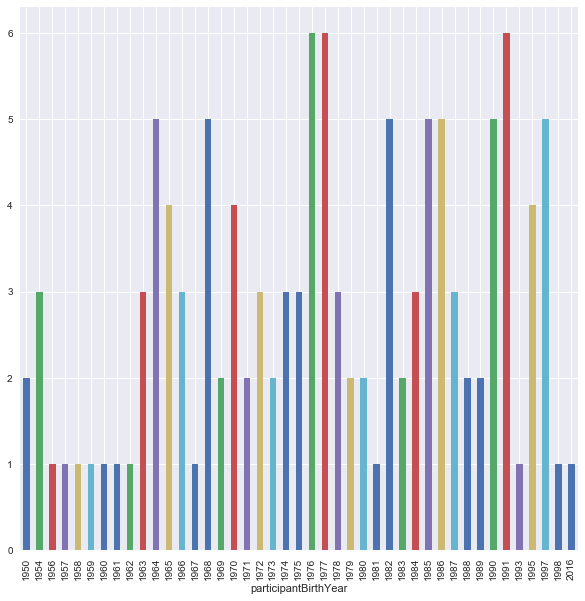

In [117]:
# have a visual view, value 2016 is a 'mistake' I guess
birthYear.plot(kind="bar", figsize= (10,10))

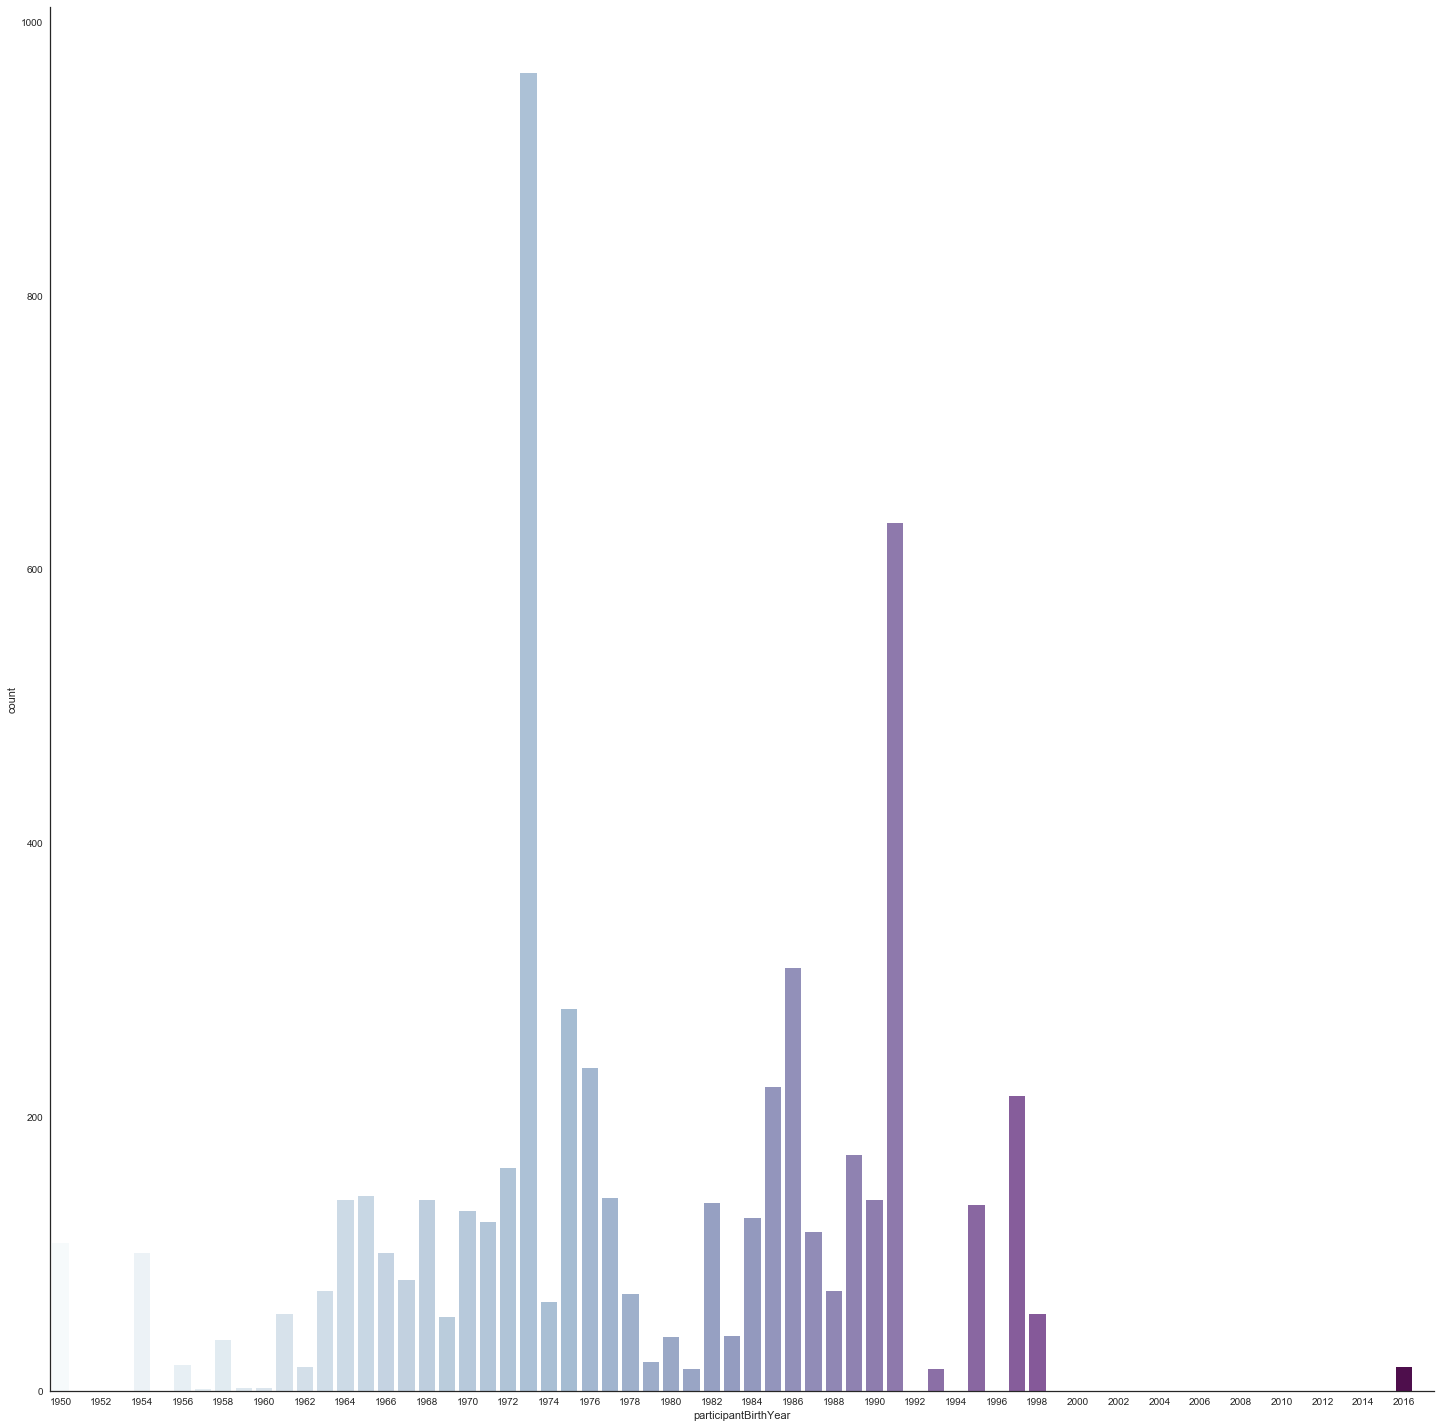

In [189]:
# Try again with seaborn but count all data points grouped by the year born

import numpy as np
import seaborn as sns
sns.set(style="white")

years = np.arange(1950, 2018)

g = sns.factorplot(x="participantBirthYear", data=raw_df, kind="count",
                   palette="BuPu", size=20, aspect=1, order=years)
g.set_xticklabels(step=2)

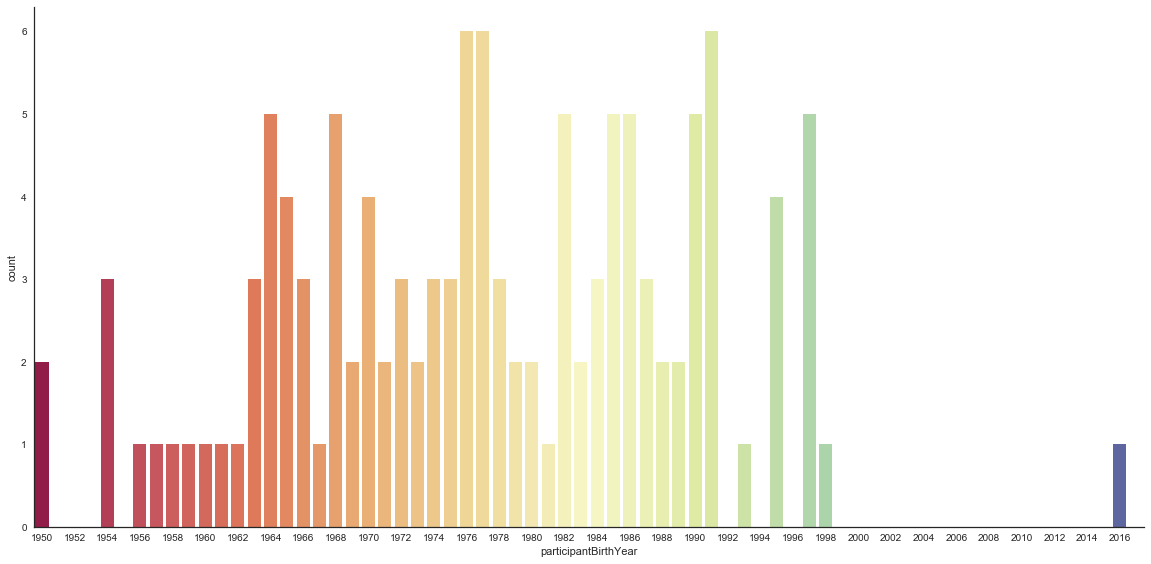

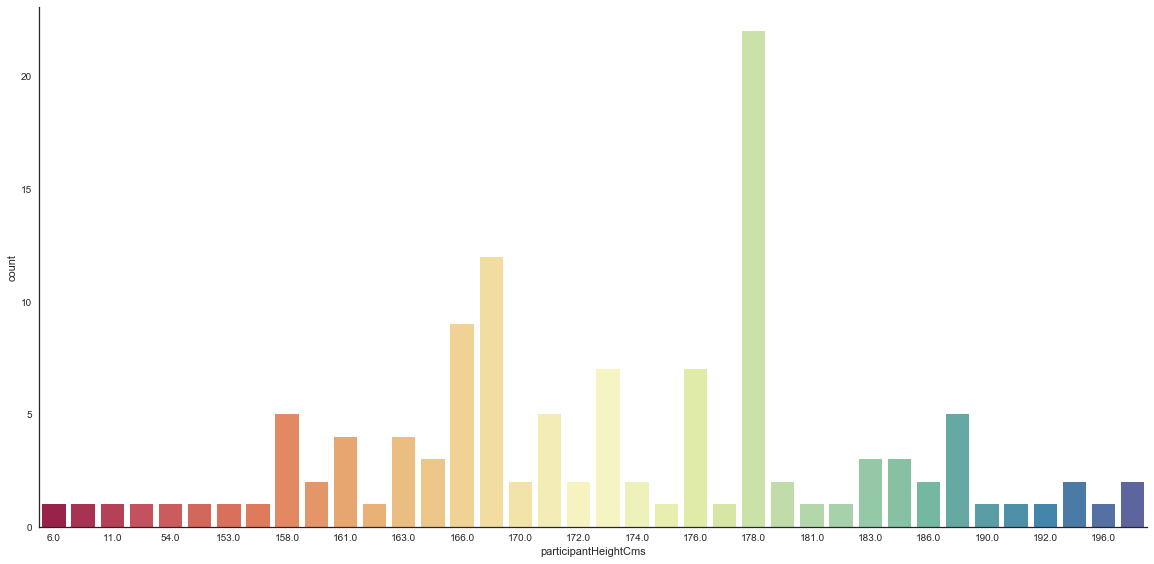

In [259]:
# Same as above with matplotlib, now seaborn

unique_individuals = immutable_df.drop_duplicates()

# birth year distribution
years = np.arange(1950, 2018)
g = sns.factorplot(x="participantBirthYear", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2, order=years)
g.set_xticklabels(step=2)


# have a look at the height
g = sns.factorplot(x="participantHeightCms", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2)
g.set_xticklabels(step=2)

# Why are so many 178 cm? Is this the default value in the app? Should be more bell shaped

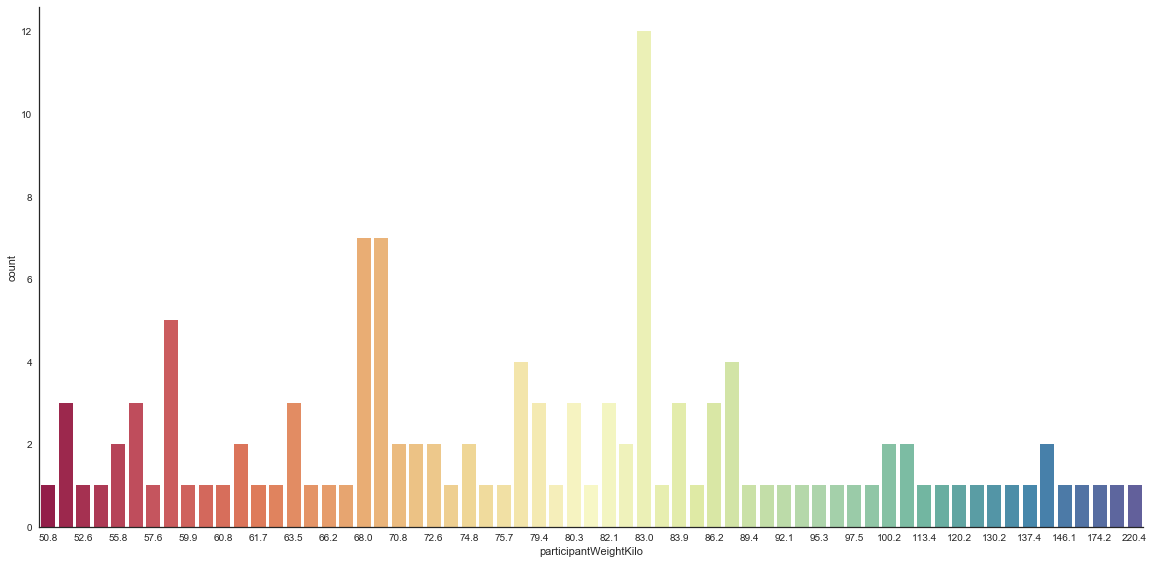

In [273]:
# convert from lbs to kilos and add as separate column
unique_individuals = unique_individuals.assign(participantWeightKilo = lambda x: np.around(0.453592*(x.participantWeightLbs),1))

# have a look at the height
g = sns.factorplot(x="participantWeightKilo", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2)
g.set_xticklabels(step=2)

# Again, 83 kilos is the default??
# --> Looks like there ar e at least more than 10 people who might not give correct height and weight

In [119]:
uniqueParticipants = raw_df.floodlightOpenId.unique()

In [120]:
uniqueParticipants.size

122

In [121]:
uniqueParticipants

array(['FL26992374', 'FL87030061', 'FL83610277', 'FL81775216',
       'FL31385479', 'FL10038084', 'FL90849674', 'FL55016609',
       'FL16524854', 'FL61600300', 'FL30549269', 'FL33228950',
       'FL48048007', 'FL89204091', 'FL54362011', 'FL39983644',
       'FL65209718', 'FL50664158', 'FL76261686', 'FL55752758',
       'FL77330626', 'FL56976082', 'FL90122626', 'FL78972083',
       'FL91660518', 'FL13771979', 'FL64866846', 'FL89910697',
       'FL59588143', 'FL16980344', 'FL13832142', 'FL83356285',
       'FL25661827', 'FL47627113', 'FL46031264', 'FL36567057',
       'FL39992817', 'FL74899157', 'FL54439576', 'FL73404300',
       'FL86492779', 'FL91170162', 'FL31362217', 'FL73356571',
       'FL33016915', 'FL62389910', 'FL28158093', 'FL19840133',
       'FL32758421', 'FL91222317', 'FL71066810', 'FL29469949',
       'FL49711173', 'FL14228874', 'FL36809856', 'FL65982871',
       'FL74551598', 'FL59467471', 'FL71191004', 'FL17295528',
       'FL82284416', 'FL16625810', 'FL48697484', 'FL258

In [122]:
raw_df.get_dtype_counts()

float64    6
int64      3
bool       1
object     7
dtype: int64

In [238]:
immutable_df = raw_df.iloc[:,0:9]

In [243]:
 grouped = immutable_df.groupby("floodlightOpenId")

In [126]:
raw_df.index

RangeIndex(start=0, stop=5728, step=1)

In [127]:
raw_df.describe()

,participantDemographicId,participantBirthYear,participantWeightLbs,participantHeightCms,testResultMetricId,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 16
count,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,0.0,0.0,5728.000000,0.0
mean,126.518331,1978.253666,170.828387,163.957228,119039.902409,NaN,NaN,35.915384,NaN
std,36.636855,11.204236,50.352271,34.040646,1685.227554,NaN,NaN,327.947869,NaN
min,61.000000,1950.000000,112.000000,6.000000,115853.000000,NaN,NaN,0.000000,NaN
25%,101.000000,1972.000000,136.000000,158.000000,117615.750000,NaN,NaN,0.130000,NaN
50%,112.000000,1976.000000,155.000000,171.000000,119047.500000,NaN,NaN,1.000000,NaN
75%,154.000000,1988.000000,183.000000,178.000000,120479.250000,NaN,NaN,6.000000,NaN
max,223.000000,2016.000000,486.000000,200.000000,122237.000000,NaN,NaN,9607.600000,NaN


In [129]:
testMetric = raw_df.groupby('testMetricName')['floodlightOpenId'].nunique()

In [130]:
testMetric

testMetricName
Bottom To Top Hausdorff Distance Best    100
Circle Hausdorff Distance Best            99
Correct Responses                         97
Figure 8 Hausdorff Distance Best         100
Hand Used                                100
Life Space Daily                          69
Mean Hausdorff Distance Best             100
Mood Response                            115
Number of shapes drawn correctly         100
Response Time Average                     97
Spiral Hausdorff Distance Best           100
Square Hausdorff Distance Best           100
Steps                                     33
Successful Pinches                       100
Sway Path                                 89
Top to bottom Hausdorff Distance Best    100
Turn Speed Average                        72
Turns                                     72
Name: floodlightOpenId, dtype: int64

In [139]:
datapoints_per_id = raw_df.groupby('floodlightOpenId')['testResultMetricId'].count()

In [149]:
# Top datapoint producers
datapoints_per_id.sort_values(ascending=False).head()

floodlightOpenId
FL16980344    962
FL83356285    515
FL54362011    155
FL55752758    152
FL76261686    143
Name: testResultMetricId, dtype: int64

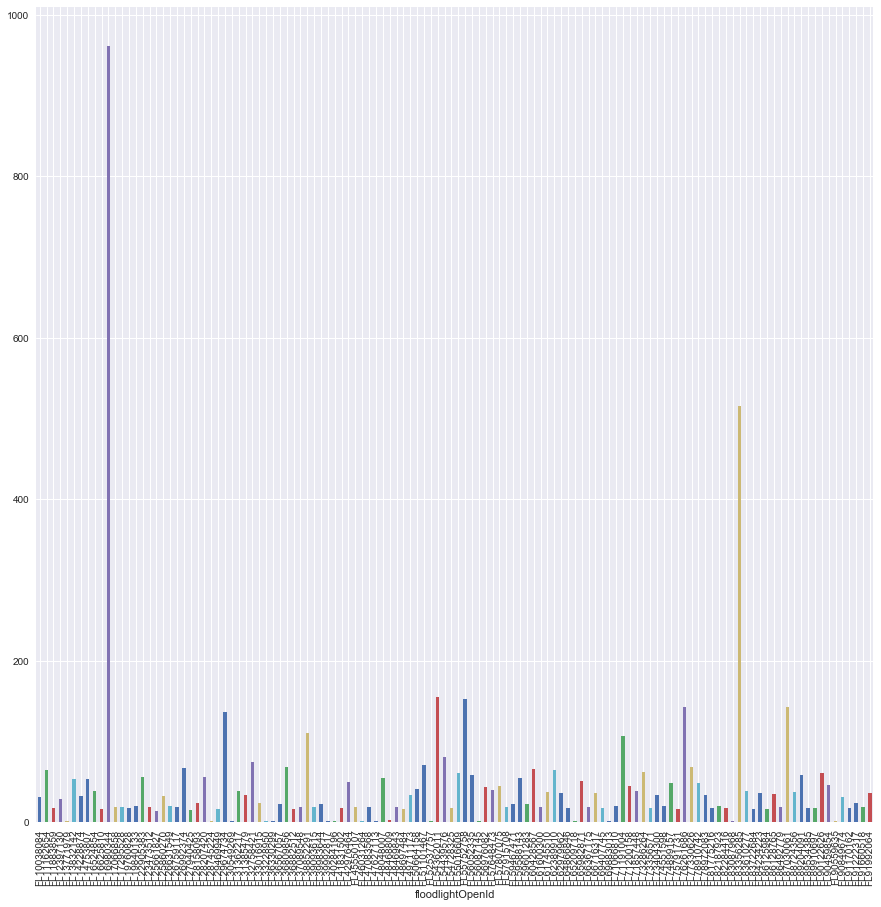

In [142]:
datapoints_per_id.plot(kind="bar", figsize= (15,15))

In [141]:
datapoints_per_id.describe()

count    122.000000
mean      46.950820
std       99.314082
min        1.000000
25%       17.000000
50%       24.000000
75%       49.750000
max      962.000000
Name: testResultMetricId, dtype: float64

In [154]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'